<h1><b><font color='blue'>The Sparks Foundation - Data Science & Business Analytics Internship</font></b></h1>

<h2><b><font color='green'>TASK 1 - Prediction using Supervised Machine Learning</font></b>
</h2><h6>In this task, it is required to predict the percentage of a student on the basis of number of hours studied using Linear Regression supervised Machine Learning algorithm</h6>
<h3><b>Steps :</b></h3>
<ul>
    <li>step 1 - Importing the Dataset</li>
    <li>step 2 - Visualizing the dataset</li>
    <li>step 3 - Data Preparation</li>
    <li>step 4 - Training the algorithm</li>
    <li>step 5 - Visualizing the Model</li>
    <li>step 6 - Making predictions</li>
    <li>step 7 - Evaluating the model</li>
</ul>

<h2><b><font color='green'>STEP 1 - Importing the dataset</font></b></h2>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings as wg
wg.filterwarnings("ignore")

In [37]:
# reading data from remote url
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [38]:
# now let's observe the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [39]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [40]:
# to find the number of rows and columns
df.shape

(25, 2)

In [41]:
# to find more information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [42]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [43]:
# now we will check if our dataset contains null or missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

=> As we can see we do not have any null values in our data set so we can now move on to our next step

<h2><font color='green' face='arial'>STEP 2 - Visualizing the dataset</font></h2><h6>In this we will plot dataset to check whether we can observe any between the two variables or not</h6>

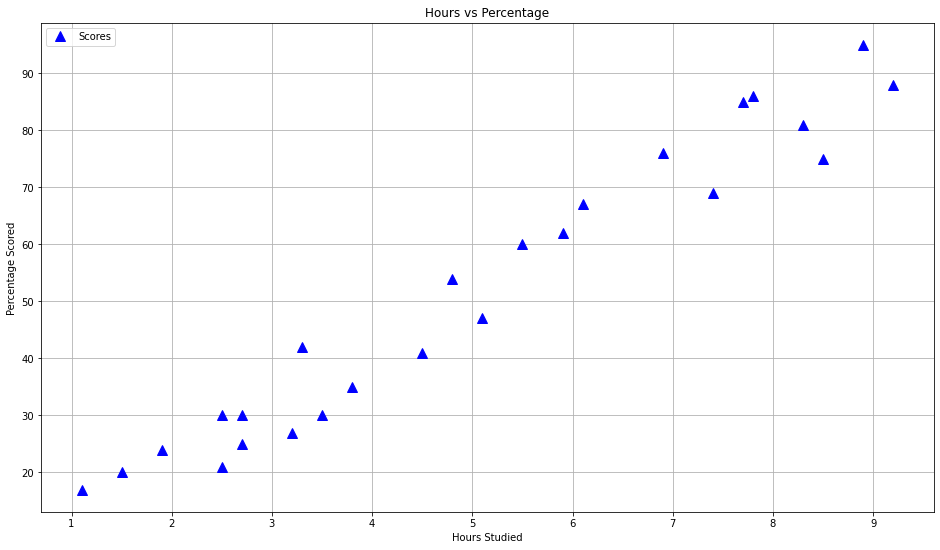

In [49]:
# Plotting the dataset
plt.rcParams["figure.figsize"] = [16,9]
df.plot(x='Hours',y='Scores',style="^",color='blue',markersize=10)
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.grid()
plt.show()

<b>From the graph above, we can observe that there is a linear relationship between the "hours studied" and "percentage score". So, we can use the linear regression supervised machine model on it to predict further values.</b>

In [50]:
#we can also use .corr to determine correlation between the variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<h2><b><font color='green' face='arial'>STEP 3 - Data preparation</font></b></h2><h6>In this step we will divide the data into "features"(inputs) and "labels"(output). After that we will split the whole dataset into 2 parts - testing data and training data</h6>

In [51]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [52]:
#using iloc function we will divide data
x = df.iloc[:,:1].values
y = df.iloc[:,1:].values

In [53]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [54]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [57]:
# splitting data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

<h2><b><font color='green' face='arial'>STEP 4 - Training the Algorithm</font></b></h2><h6>we have splitted our data into training and testing sets, and now we train our model.</h6>

In [58]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

<h2><b><font color="green" face="arial">STEP 5 - Visualizing the model</font></b></h2><h6>After training the model, now its time to visualize it.</h6>

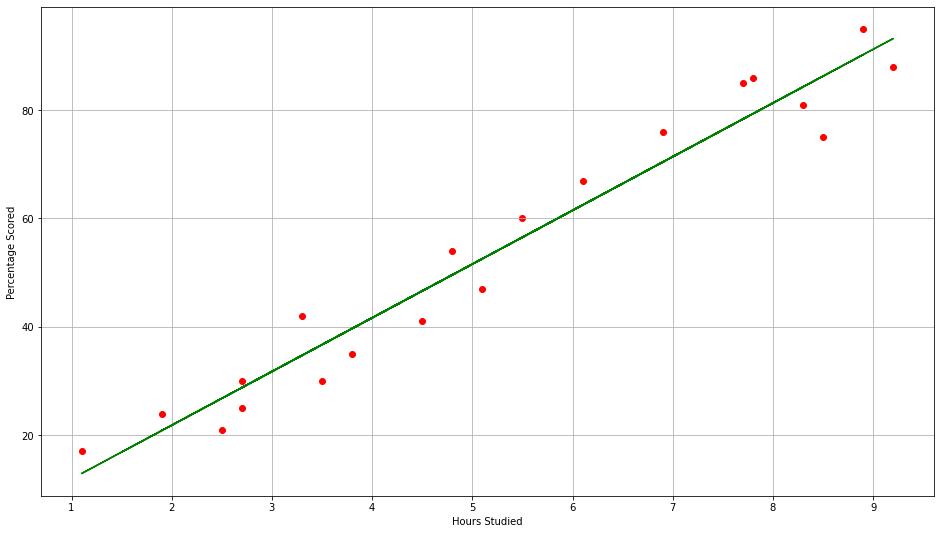

In [60]:
line = model.coef_*x + model.intercept_

# Plotting for the training data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x_train,y_train,color='red')
plt.plot(x,line,color='green')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.grid()
plt.show()

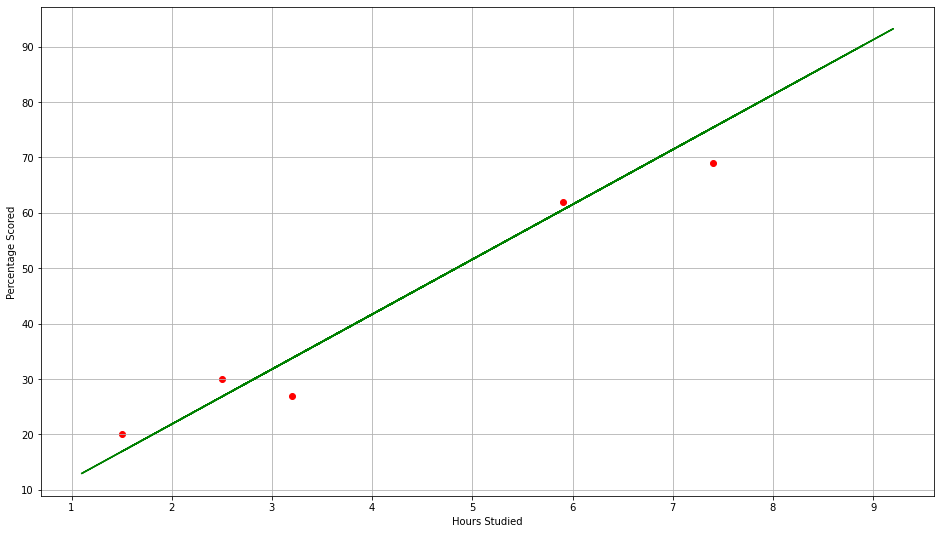

In [61]:
# Plotting for the testing data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x_test,y_test,color='red')
plt.plot(x,line,color='green')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.grid()
plt.show()

<h2><b><font color="green" face="arial">STEP 6 - Making Predictions</font></b></h2><h6>As, we have trained our algorithm, it's time to make some predictions</h6>

In [63]:
print(x_test) # testing data - In hours
y_pred = model.predict(x_test) # Predicting the Scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [64]:
#comparing Actual vs Predicated

y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [65]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [66]:
# comparing Actual vs Predicate
comp = pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [69]:
# Testing with your own data

hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


<h2><b><font color='green' face='arial'>STEP 7 - Evaluating the model</font></b></h2><h6>In the last step, we are going to evaluate our trained model by calculating by caculating absolute error</h6>

In [70]:
from sklearn import metrics

print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error :  4.183859899002975
